# 역행렬

- A의 역행렬
    - A와 곱해서 단위 행렬을 만드는 행렬
    - $A^{-1}$
    - $A^{-1}A = I$
    - 행렬을 취소(cancel) 하는 것과 같다
    - 행렬을 단위 행렬로 선형 변환 하는 것
- 역행렬을 구하는 이유
    - $Ax=b$ 형태의 행렬 방정식에서 
    - A와 b는 이미 알고 있는 값
    - x를 구하려면, x에 적용된 A 행렬을 **취소** 해야 한다
- 일반적인 답을 구하는 과정
    - $Ax = b$
    - $A^{-1}Ax = A^{-1}b$
    - $Ix = A^{-1}b$
    - $x = A^{-1}b$
    

# 역행렬의 유형과 가역의 조건

- 역행렬이 항상 존재 하는 것은 아니다.
- 다음과 같이 세가지 종류의 역행렬이 있다.

**완전 역행렬**
- $A^{-1}A = AA^{-1} = I$
- 완전 역행렬이 되기 위한 조건
    - 정방 행렬 & 최대 계수
    
**단방향 역행렬**
- 정방이 아닌 행렬의 역행렬
    - 최대로 가능한 계수일 때만 가능
        - 높은 행렬 T(MxN, M>N)은 계수가 N일때
        - 넓은 행렬 W(MxN, M<N)은 계수가 M일 때
    - 높은 행렬 T는 왼쪽 역행렬
        - $LT=I$
    - 넓은 행렬 W는 오른쪽 역행렬
        - $WR=I$

**의사 역행렬**
- 모든 행렬에 계수 상관 없이 존재
    - 행렬이 정방 최대 계수 일 때, 의사역행렬 은 완전 역행렬과 동일
    - 행렬이 정방이 아닌 최대계수를 가질 때, 의사역행렬은 왼쪽/오른쪽 역행렬과 동일
    - 축소계수 행렬(특이 행렬)의 의사 역행렬은,단위 행렬과 가까운 행렬로 변환해 줌
- 특이 또는 비가역 행렬
    - 완전 역행렬, 단방향 역행렬이 존재 하지 않는 행렬
    - 축소 계수 또는 계수 부족과 같은 의미

### 연습 문제 7-1
- 역행렬의 역행렬은 원래의 행렬이 된다.
- 즉, $(A^{-1})^{-1} = A$ 로 
- $1/(1/a) = a$ 와 유사 
- 파이썬을 사용 증명해 보라

In [76]:
import numpy as np

n = 100
A = np.random.randn(n , n)

In [77]:
A_1 = np.linalg.inv(A)
A_1_1 = np.linalg.inv(A_1)
np.allclose(A, A_1_1)

True

# 역행렬 계산
- 스칼라 역으로 역행렬 계산 시도

$
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}^{-1}  = 
\begin{bmatrix}
1/a & 1/b \\
1/c & 1/d \\
\end{bmatrix}
$

- 원하는 결과가 아님

$
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}^{-1}
\begin{bmatrix}
1/a & 1/b \\
1/c & 1/d \\
\end{bmatrix} = 
\begin{bmatrix}
1+b/c & a/b+b/d \\
c/a + d/c & 1+ c/b \\
\end{bmatrix} 
$

## 2x2 행렬의 역행렬

- 2x2 행렬의 역행렬을 구하는 법
    - 대각 원소를 교환
    - 대학이 아닌 원소에 -1을 곱한다
    - 행렬식으로 나눠 준다
    
- 수식 표현

$
A= \begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
$

$
A^{-1}= \frac{1}{ad-bc}\begin{bmatrix}
d & -b \\
-c & a \\
\end{bmatrix}
$

$
AA^{-1}= \begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}\frac{1}{ad-bc}\begin{bmatrix}
d & -b \\
-c & a \\
\end{bmatrix}
= \frac{1}{ad-bc}\begin{bmatrix}
ad-bc & 0 \\
0 & ad-bc \\
\end{bmatrix} =
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
$

In [78]:
A = np.array([[1, 4], [2, 7]])
Ainv = np.linalg.inv(A)
A@Ainv

array([[1., 0.],
       [0., 1.]])

In [79]:
Ainv@A

array([[1., 0.],
       [0., 1.]])

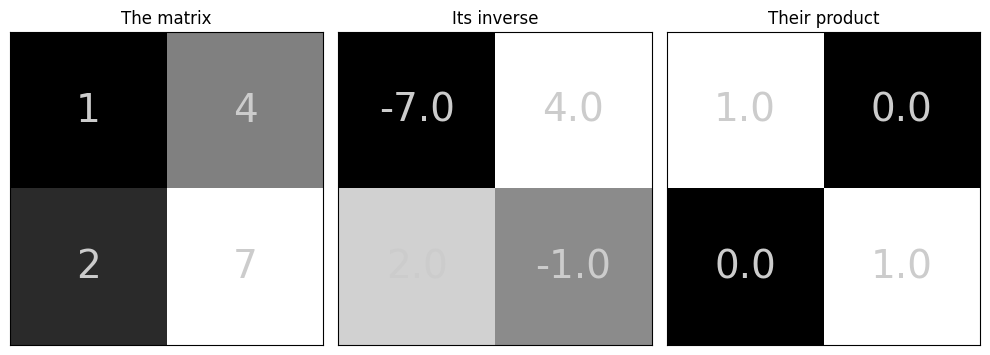

In [80]:
import matplotlib.pyplot as plt
# The matrices visualized

fig,axs = plt.subplots(1,3,figsize=(10,6))


# the matrix
axs[0].imshow(A,cmap='gray')
axs[0].set_title('The matrix')
for (j,i),num in np.ndenumerate(A):
    axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

# its inverse
axs[1].imshow(Ainv,cmap='gray')
axs[1].set_title('Its inverse')
for (j,i),num in np.ndenumerate(Ainv):
    axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

# their product
AAi = A@Ainv
axs[2].imshow(AAi,cmap='gray')
axs[2].set_title('Their product')
for (j,i),num in np.ndenumerate(AAi):
    axs[2].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)


# common properties
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

- 특이(축소 계수) 행렬의 예

In [81]:
A = np.array([[1, 4], [2,8]])
Ainv = np.linalg.inv(A)

LinAlgError: Singular matrix

- 축소 계수 행렬은 역행렬을 가지지 않는다.
    - 의사역행렬은 가진다

## 대각 행렬의 역행렬
- 정방 대각 행렬의 역행열 계산은 쉽다

$
 \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 4 \\
\end{bmatrix}
\begin{bmatrix}
b & 0 & 0 \\
0 & c & 0 \\
0 & 0 & d \\
\end{bmatrix} = 
\begin{bmatrix}
2b & 0 & 0 \\
0 & 3c & 0 \\
0 & 0 & 4d \\
\end{bmatrix}
$

- 위 결과가 단위 행렬이 되려면, b=1/2, c=1/3, d=1/4
- 대각선에 0이 있는 경우는 1/0을 구할 수 없기에 역행렬을 구할 수 없다.

## 임의의 정방 최대계수 행렬의 역행렬
- np.linalg.inv 를 통해 역행렬을 구할 수 있다.
- 역행렬을 구하는 과정에서 다음과 같은 중간 단계의 행렬이 생성된다
    - 소행렬(minors matrix)
    - 격자행렬(grid matrix)
    - 여인수행렬(cofactors matrix)
    - 수반행렬(adjugate matrix)
- 소행렬    
    - 부분행렬의 행렬식으로 구성
    - 소행렬의 각 원소 $m_{i,j}$는 i번째 행과 j번째 열을 제외하고 만든 부분행렬의 행렬식

<img src='./images/fig_07_02.png'>

- 격자행렬
    - +1과 -1을 교대로 사용하는 체스판
    - $g_{i, j} = -1^{i+j}$
    
- 여인수행렬
    - 소행렬과 격자행렬의 아다마르곱의 결과
    
- 수반행렬
    - 여인수행렬의 전치
- 역행렬은 행렬식과 수반행렬을 사용해 구할 수 있다.
    - $A^{-1} = \frac{1}{det(A)}adj(A)$

<img src='./images/fig_07_03.png'>

### 연습 문제 7-2
- 7.3.3 '임의의 정방 최대계수 행렬의 역행렬' 의 알고리즘을 구현하라
- 그림 7-3을 재현 하라

In [82]:
n = 4
A = np.random.randn(n, n)

M = np.zeros((n ,n)) # minors matrix
G = np.zeros((n ,n)) # grid matrix

for i in range(n):
    for j in range(n):
        rows = [True]*n
        rows[i] = False
        cols = [True]*n
        cols[j] = False
        
        M[i, j] = np.linalg.det(A[rows, :][:, cols])
        G[i, j] = (-1)**(i+j)
        
C = M*G # cofactors
Ainv = C.T/np.linalg.det(A)

np.allclose(Ainv, np.linalg.inv(A))

True

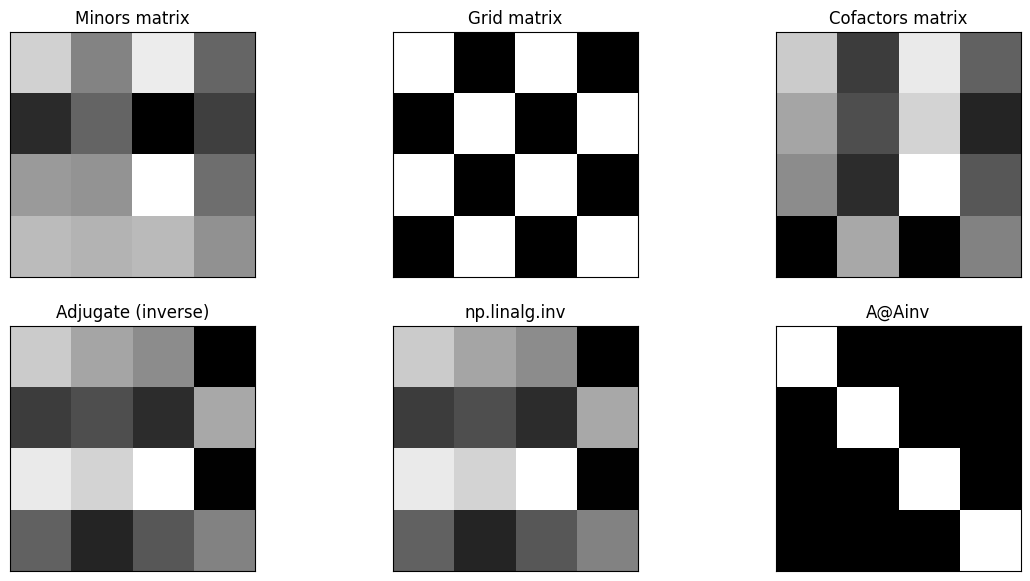

In [83]:
# plot them
import matplotlib.pyplot as plt

fig,axs = plt.subplots(2,3,figsize=(14,7))

axs[0,0].imshow(M,cmap='gray')
axs[0,0].set_title('Minors matrix')

axs[0,1].imshow(G,cmap='gray')
axs[0,1].set_title('Grid matrix')

axs[0,2].imshow(C,cmap='gray')
axs[0,2].set_title('Cofactors matrix')

axs[1,0].imshow(Ainv,cmap='gray')
axs[1,0].set_title('Adjugate (inverse)')

axs[1,1].imshow( np.linalg.inv(A),cmap='gray')
axs[1,1].set_title('np.linalg.inv')

axs[1,2].imshow(A@Ainv,cmap='gray')
axs[1,2].set_title('A@Ainv')

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])


plt.savefig('Figure_07_03.png',dpi=300)
plt.show()

## 단방향 역행렬
- 높은 행렬 T(MxN, M>N)의 역행렬 
    - 완전 역행렬은 존재하지 않지만, 왼쪽 역행렬
    - $LT=I$는 존재
    - 최대계수가 N
- $L$를 찾는 방법
    - T의 전치를 T에 곱해 T를 정방 행렬로 만든다
    - 위 정방행렬의 역행렬을 구한다
    - 위 형행렬에 T의 전치를 곱한다

In [21]:
T = np.random.randint(-10, 11, size=(40, 4))

In [22]:
TtT = T.T@T
TtT.shape

(4, 4)

In [23]:
np.eye(4,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [24]:
TtT_inv = np.linalg.inv(TtT)
np.allclose(TtT_inv@TtT, np.eye(T.shape[1], T.shape[1]))

True

- $(T^TT)^{-1}(T^TT) = I$
- $L = (T^TT)^{-1}T^T$

In [25]:
L = TtT_inv@T.T
np.allclose(L@T, np.eye(T.shape[1], T.shape[1]))

True

In [26]:
L.shape, T.shape

((4, 40), (40, 4))

In [27]:
(T@L).shape

(40, 40)

In [28]:
np.allclose(T@L, np.eye(T.shape[0], T.shape[0]))

False

<img src='./images/fig_07_04.png'>

- 왼쪽 역행렬의 중요도
    - 통계 모델을 데이터에 적합하는 방법과 최소제곱법에서 사용
    - 현대 인류 문명에 가장 중요한 기여

### 연습 문제 7-4
- 넓은 행렬에 대한 오른쪽 행렬을 유도 한다
- 그림 7-4를 재현 한다.

- $(WW^T)(WW^T)^{-1} = I$
- $R = W^T(WW^T)^{-1}$

In [91]:
W = np.random.randint(-10,11, size=(4, 40))

In [92]:
WWt = W@W.T
WWt.shape

(4, 4)

In [93]:
WWt_inv = np.linalg.inv(WWt)
WWt_inv.shape

(4, 4)

In [94]:
np.allclose(WWt@WWt_inv, np.eye(W.shape[0], W.shape[0]))

True

In [95]:
R = W.T@WWt_inv

In [96]:
np.allclose(W@R, np.eye(W.shape[0], W.shape[0]))

True

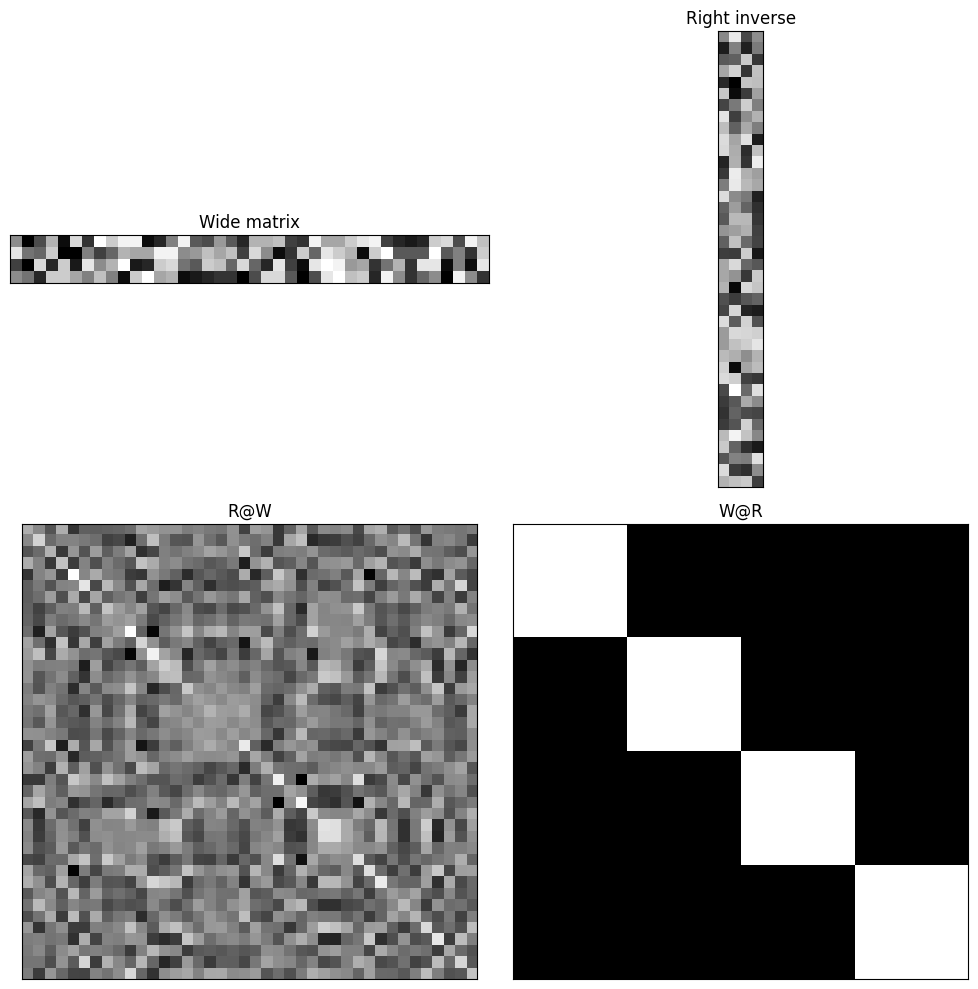

In [97]:
# visualize! of course :)

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(W,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@W,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(W@R,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])
  
plt.tight_layout()
plt.show()

# 역행렬의 유일성
- 역행렬은 하나만 있다는 것에 대한 증명
    - 행렬 A는 가역적
    - 행렬 B와 C가 A의 역행렬
    - $B \neq C$ 로 가정
    - $C = CI = CAB = IB = B$
    - $B \neq C$ 가정은 틀림

# 무어-펜로스 의사역행렬
- 특이 행렬의 의사역행렬은 유일하지 않다 (무한하다)
- 무어-펜로스 의사역행렬(Moore-Pemose pseudo inverse matrix), MP
    - 가장 일반적으로 사용되는 의사역행렬
    - np.linalg.pinv() 함수 사용
    - 알고리즘 설명은 12장에서

In [99]:
A = np.array([[1, 4], [2, 8]])
Apinv = np.linalg.pinv(A)
A@Apinv

array([[0.2, 0.4],
       [0.4, 0.8]])

### 연습 문제 7-5
- 의사가역행렬이 가역 행렬의 완전 역행렬과 같다는 것을 보여라

In [100]:
M = 4
A = np.random.randn(M, M)
Ainv = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)
np.allclose(Ainv, Apinv)

True

- 높은 행렬의 경우 의사가역행렬이 왼쪽 역행렬과 같고

In [101]:
T = np.random.randint(-10, 11, size=(40, 4))
TtT = T.T@T
TtT_inv = np.linalg.inv(TtT)
L = TtT_inv@T.T

In [102]:
Tpinv = np.linalg.pinv(T)

In [103]:
np.allclose(L, Tpinv)

True

- 넓은 행렬의 경우는 오른쪽 행렬과 같음을 보여라

In [104]:
W = np.random.randint(-10,11, size=(4, 40))
WWt = W@W.T
WWt_inv = np.linalg.inv(WWt)
R = W.T@WWt_inv

In [105]:
Wpinv = np.linalg.pinv(W)

In [106]:
np.allclose(R, Wpinv)

True

# 역행렬의 수치적 안정성

- 역행렬 계산시 행렬식 등에서 많은 부동소수점 연산을 하게 됨
- 수치적 부정확성 발생 가능, 누적시 심각한 문제 발생 
- LAPACK(저수준 라이브러리) 등은 역행렬 계산을 되도록 안하려고 함
    - QR분해 등을 사용
- 수칫값이 대체로 같은 범위에 포함 되어 있을 수록 행렬이 더 안정적인 경향(보장은 안됨)
- '수칫값의 범위'를 행렬의 **조건수** 라고 함
    - 가장 큰 값과 가장 작은 특잇값의 비율
    - 13장에서 소개
- 힐버트 행렬
    - 수치값이 불안정한 대표적인 행렬
    - $h_{i,j} = \frac{1}{i+j-1}$
    - 3x3 힐버트 행렬 예시
    - $\begin{bmatrix}
1 & 1/2 & 1/3 \\
1/2 & 1/3 & 1/4 \\
1/3 & 1/4 & 1/5 \\
\end{bmatrix}
$
    - 행렬이 커질 수록 수치값의 범위가 커지고, 계수는 급격히 작아진다
    - 최대계수의 힐버트 행렬은 전혀 다른 수치 범위의 역행렬을 가진다


<img src='./images/fig_07_05.png'>

### 연습 문제 7-9
- 힐버트 행렬을 사용, 역행렬과 수치 불안정성의 위험을 살펴 보자
- 식 7-1에 맞춰 입력받은 정수 값으로 힐버트 행렬을 생성한다
- 그림 7-5를 재현 한다.
    - for 문을 사용하여 만들어 보고
    - 외적을 사용하여서도 만들어 본다
- 함수의 정확성은 scipy.linalg의 힐버트 함수와 비교한다.    

In [44]:
def hilbert_1(k):
    H = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            h = 1/(i+j +1)
            H[i, j] = h
    return H

In [45]:
H1 = hilbert_1(3)

In [46]:
def hilbert_2(k):
    k = np.arange(1,k+1).reshape(1,-1) # 행 벡터로 재구성합니다 (1D 배열 대신)
    return 1 / (k.T+k-1) # 외적과 요소별 나눗셈

In [47]:
H2 = hilbert_2(3)

In [48]:
from scipy.linalg import hilbert

H3 = hilbert(3)

In [49]:
np.allclose(H1, H3)

True

In [50]:
np.allclose(H2, H3)

True

- hilbert_2 설명

In [51]:
k = np.arange(1,3+1).reshape(1,-1)
# k = np.arange(1,3+1)
k, k.shape

(array([[1, 2, 3]]), (1, 3))

In [52]:
k.T, (k.T).shape

(array([[1],
        [2],
        [3]]),
 (3, 1))

In [53]:
k.T + k -1

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

### 연습 문제 7-10
- 다음을 3x3에서 12x12에 이르는 다양한 행렬에 수행 할 수 있도록 for 루프 작성
    - 힐버트 행렬 함수로 힐버트 행렬을 만든다
    - np.linglag.inv 로 역행렬을 구해 원래 함수에 곱한다
    - 이 곱의 결과가 단위 행렬과 일치 해야 한다.
    - 이를 확인 하기 위해 단위 행렬과 유클리드 거리가 0 임을 확인 한다.
- 각 행렬 크기에 대해 유클리드 거리와 조건수를 저장 한다
    - 조건수는 행렬의 수칫값의 퍼짐 정도(np.linalg.cond 함수 사용)
- 위 코드를, 힐버트 행렬이 아니라 가우스 난수 행렬도 반복 한다.
- 두 결과를 그래프로 시각화 하며 비교 한다.

In [54]:
import numpy as np
from scipy.linalg import hilbert

matSizes = np.arange(3, 13)

dist = np.zeros((len(matSizes), 2))
cond = np.zeros((len(matSizes), 2))

for i, k in enumerate(matSizes):
    I = np.eye(k, k)
    
    # 힐버트 행렬 계산
    H = hilbert(k)
    cond[i, 0] = np.linalg.cond(H)
    
    # 역행렬을 곱하여 단위 행렬과 비교
    H_I = H @ np.linalg.inv(H)
    dist[i, 0] = np.sqrt(np.sum((H_I - I) ** 2))
    
    # 가우스 난수 행렬 계산
    G = np.random.randn(k, k)
    cond[i, 1] = np.linalg.cond(G)
    
    # 역행렬을 곱하여 단위 행렬과 비교
    G_I = G @ np.linalg.inv(G)
    dist[i, 1] = np.sqrt(np.sum((G_I - I) ** 2))


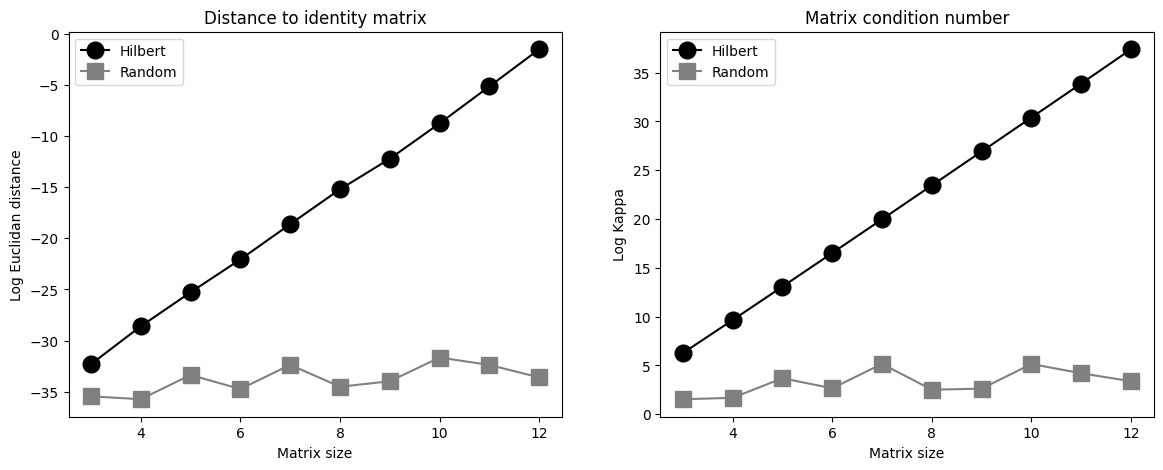

In [55]:
# now plot
fig,axs = plt.subplots(1,2,figsize=(14,5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes,np.log(dist),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')


## plot the condition numbers
h = axs[1].plot(matSizes,np.log(cond),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.show()

**정답**

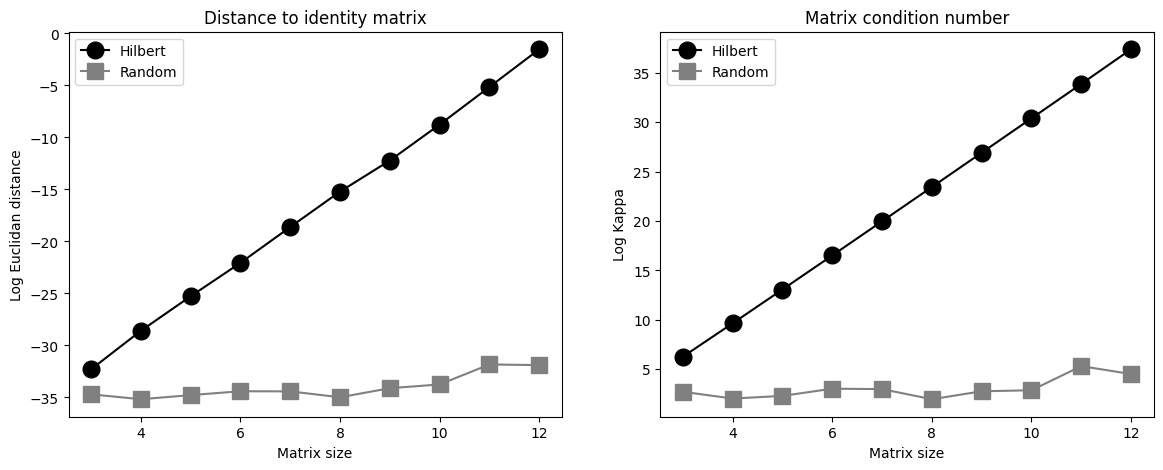

In [56]:
matSizes = np.arange(3,13)

identityError = np.zeros((len(matSizes),2))
condNumbers   = np.zeros((len(matSizes),2))


for i,k in enumerate(matSizes):
    
    ### for the Hilbert matrix
    H   = hilbert(k)       # the matrix
    Hi  = np.linalg.inv(H) # its inverse
    HHi = H@Hi             # should be identity
    err = HHi - np.eye(k)  # difference from true identity
    identityError[i,0] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,0] = np.linalg.cond(H) # condition number
    

    ### repeat for a random matrix
    H = np.random.randn(k,k) # the matrix
    Hi  = np.linalg.inv(H)   # its inverse
    HHi = H@Hi               # should be identity
    err = HHi - np.eye(k)    # difference from true identity
    identityError[i,1] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,1] = np.linalg.cond(H) # condition number
    


# now plot
fig,axs = plt.subplots(1,2,figsize=(14,5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes,np.log(identityError),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')



## plot the condition numbers
h = axs[1].plot(matSizes,np.log(condNumbers),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.show()

# 역행렬의 기하학적 해석

- 역행렬은 행렬 곱으로 인한 기하학적 변환을 되돌리는 것

<img src='./images/fig_07_06.png'>


$Q = TP$

$U = T^{-1}Q$

$U=T^{-1}TP$

- P는 최초  좌표인 2 X N 행렬
- T는 변환 행렬
- Q는 변환된 좌표의 행렬
- U는 역변환 좌표의 행렬


## 연습 문제 7-8
- 그림 7-6 을 재현 하라

/tmp/ipykernel_838275/2894017992.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(invtransformedPoints[0,:],invtransformedPoints[1,:],'rx',markersize=15,


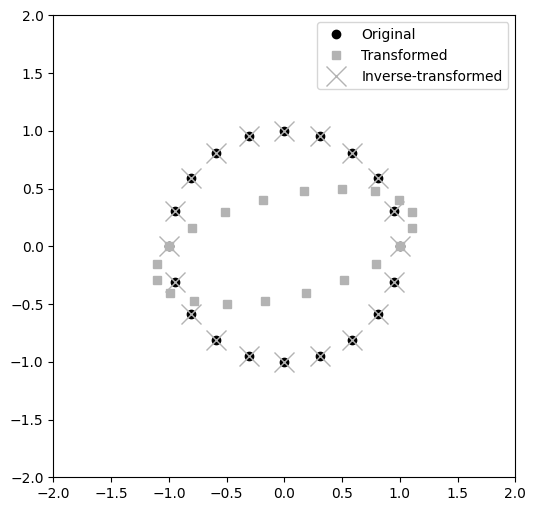

In [57]:
# Transformation matrix
T = np.array([
              [1,.5],
              [0,.5]
            ])


# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints

invtransformedPoints = np.linalg.inv(T) @ transformedPoints

# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')
plt.plot(invtransformedPoints[0,:],invtransformedPoints[1,:],'rx',markersize=15,
         color=[.7,.7,.7],label='Inverse-transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.show()

### 연습 문제 7-6
- LIVE EVIL 규칙은 곱 행렬의 역행렬에도 적용 됨을 코드로 확인 하라
- 두 개의 정방 최대 계수 행렬 A, B 생성
- 유클리드 거리를 사용 다음을 비교 하라
    - 1. $(AB)^{-1}$
    - 2. $A^{-1}B^{-1}$
    - 3. $B^{-1}A^{-1}$
- 코딩 시작전 어느 값이 같을지 생각해 보자
- 다음과 같은 형식으로 출력 하라 
    - (AB)^-1과 (A^-1)(B^-1) 사이의 거리는 xxxx
    - (AB)^-1과 (B^-1)(A^-1) 사이의 거리는 xxxx
- 추가로 LIVE EVIL 규칙이 더 긴 행렬(두 행렬이 아니라 네 행렬)에도 적용되는지 확인 하라

In [73]:
M = 4
A = np.random.randn(M, M)
B = np.random.randn(M, M)

case1 = np.linalg.inv(A@B)
case2 = np.linalg.inv(A)@np.linalg.inv(B)
case3 = np.linalg.inv(B)@np.linalg.inv(A)

In [59]:
dist1 = np.sqrt(np.sum((case1 - case2)**2))

print(f'(AB)^-1과 (A^-1)(B^-1) 사이의 거리는 {dist1}')

(AB)^-1과 (A^-1)(B^-1) 사이의 거리는 3.670600945578201


In [60]:
dist2 = np.sqrt(np.sum((case1 - case3)**2))

print(f'(AB)^-1과 (B^-1)(A^-1) 사이의 거리는 {dist2}')

(AB)^-1과 (B^-1)(A^-1) 사이의 거리는 5.700038435117141e-16


### 연습 문제 7-7
- LIVE EVIL 규칙이 단방향 역행렬에도 적용 되는가?
- $(T^TT)^{-1} = T^{-T}T^{-1}$ 인가?

In [64]:
T = np.random.randn(40, 4)
Tpinv = np.linalg.pinv(T)

In [65]:
case1 = np.linalg.pinv(T.T@T)
case2 = np.linalg.pinv(T.T)@np.linalg.pinv(T)
case3 = np.linalg.pinv(T)@np.linalg.pinv(T.T)

In [66]:
dist1 = np.sqrt(np.sum((case1 - case2)**2))

print(f'(T^T)(T)과 (T^T)(T^-1) 사이의 거리는 {dist1}')

ValueError: operands could not be broadcast together with shapes (4,4) (40,40) 

In [67]:
dist2 = np.sqrt(np.sum((case1 - case3)**2))

print(f'(T^T)(T)과 (T^-1)(T^T) 사이의 거리는 {dist2}')

(T^T)(T)과 (T^-1)(T^T) 사이의 거리는 4.880969325610476e-17


# 정리

- 역행렬은 행렬곱을 통해 완전 행렬을 최대계수 행렬로 변환하는 행렬
- 역행렬은 방정식에서 행렬을 이동시키는 등 다양한 용도로 사용 ($Ax=b$에서 x구하기)
- 정방 최대계수 행렬에는 완전 역행렬 존재
- 높은 최대계수 행렬에는 왼쪽 역행렬 존재
- 넓은 최대계수 행렬에는 오른쪽 역행렬 존재
- 축소 계수 행렬은 단위 행렬로 선형 변환은 안되지만, 단위 행렬에 행렬로 변환 시키는 의사역행렬이 무수히 존재
- 역행렬은 고유하다
- 2x2행렬과 대각 행렬의 역행렬을 계산하는 간단한 방법이 있음
- 수치 정밀도 오류의 위험 때문에 역행렬을 직접 구하는 것 대신 다른 방법을 사용함